<a href="https://colab.research.google.com/github/the1onwrongway/Customer-Purchases-Behaviour/blob/main/Customer_Purchase_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data anlysis of Customer Purhcase Behaviour on dataset on Kaggle!

### 1. Importing Dependancies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Dataset

#### 2.1 Importing Dataset

In [16]:
df = pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27.0,Male,40682.0,Bachelor,East,Gold,frequent,18249.0,Books,0.0,6.0
1,2,29.0,Male,15317.0,Masters,West,Regular,rare,4557.0,Clothing,1.0,6.0
2,3,37.0,Male,38849.0,Bachelor,West,Silver,rare,11822.0,Clothing,0.0,6.0
3,4,30.0,Male,11568.0,HighSchool,South,Regular,frequent,4098.0,Food,0.0,7.0
4,5,31.0,Female,46952.0,College,North,Regular,occasional,19685.0,Clothing,1.0,5.0


#### 2.2 Understanding Dataset

In [17]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,52575.000000,52574.000000,52574.000000,52574.000000,52574.000000,52574.000000
mean,26288.000000,29.996709,27531.024594,9650.947217,0.299787,5.009225
std,15177.239538,4.484806,12984.093602,4806.824307,0.458169,1.039154
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,1.000000
25%,13144.500000,27.000000,16269.250000,5592.000000,0.000000,4.000000
50%,26288.000000,30.000000,27624.000000,9475.000000,0.000000,5.000000
75%,39431.500000,33.000000,38798.750000,13364.000000,1.000000,6.000000
max,52575.000000,49.000000,49997.000000,24751.000000,1.000000,10.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52575 entries, 0 to 52574
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  52575 non-null  int64  
 1   age                 52574 non-null  float64
 2   gender              52574 non-null  object 
 3   income              52574 non-null  float64
 4   education           52574 non-null  object 
 5   region              52574 non-null  object 
 6   loyalty_status      52574 non-null  object 
 7   purchase_frequency  52574 non-null  object 
 8   purchase_amount     52574 non-null  float64
 9   product_category    52574 non-null  object 
 10  promotion_usage     52574 non-null  float64
 11  satisfaction_score  52574 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 4.8+ MB


In [19]:
df.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [20]:
age = df['age'].value_counts()
age

age
30.0    4649
29.0    4558
31.0    4516
28.0    4346
32.0    4219
33.0    3725
27.0    3672
34.0    3149
26.0    3093
25.0    2563
35.0    2563
24.0    1912
36.0    1866
23.0    1421
37.0    1392
38.0     945
22.0     922
21.0     663
39.0     648
20.0     399
40.0     358
41.0     261
19.0     234
42.0     131
18.0     121
43.0      67
17.0      65
16.0      27
44.0      26
45.0      21
15.0      19
46.0       7
14.0       6
47.0       5
48.0       2
13.0       1
49.0       1
12.0       1
Name: count, dtype: int64

In [21]:
education = df['education'].value_counts()
education

education
College       20983
Bachelor      15911
HighSchool    10582
Masters        5098
Name: count, dtype: int64

In [22]:
region = df['region'].value_counts()
region

region
East     15891
West     15793
South    10569
North    10321
Name: count, dtype: int64

In [23]:
loyalty = df['loyalty_status'].value_counts()
loyalty

loyalty_status
Regular    31551
Silver     15852
Gold        5171
Name: count, dtype: int64

In [24]:
freq = df['purchase_frequency'].value_counts()
freq

purchase_frequency
rare          26307
occasional    15627
frequent      10640
Name: count, dtype: int64

In [25]:
cat = df['product_category'].value_counts()
cat

product_category
Electronics    15712
Clothing       10499
Food            7919
Books           7819
Health          5272
Home            2678
Beauty          2675
Name: count, dtype: int64

In [26]:
score = df['satisfaction_score'].value_counts()
score

satisfaction_score
5.0     20288
6.0     12793
4.0     12473
7.0      3192
3.0      3186
8.0       326
2.0       286
9.0        18
1.0        11
10.0        1
Name: count, dtype: int64

In [27]:
promo = df['promotion_usage'].value_counts()
promo

promotion_usage
0.0    36813
1.0    15761
Name: count, dtype: int64

### 3.Data Cleaning

In [28]:
df['id'] = df['id'].astype(str)
df.head(2)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27.0,Male,40682.0,Bachelor,East,Gold,frequent,18249.0,Books,0.0,6.0
1,2,29.0,Male,15317.0,Masters,West,Regular,rare,4557.0,Clothing,1.0,6.0


In [29]:
df['promotion_usage'] = df['promotion_usage'].replace({1: 'Y', 0: 'N'})
promo = df['promotion_usage'].value_counts()
promo

promotion_usage
N    36813
Y    15761
Name: count, dtype: int64

In [30]:
df = df.set_index('id')
df.head(2)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
id,,,,,,,,,,,
1,27.0,Male,40682.0,Bachelor,East,Gold,frequent,18249.0,Books,N,6.0
2,29.0,Male,15317.0,Masters,West,Regular,rare,4557.0,Clothing,Y,6.0


In [31]:
bins = [0, 21, 31, 41, 100]  # Age bins
labels = ['0-20', '21-30', '31-40', '41+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='age',
                              index='age_group',
                              aggfunc={'age': [min, max]})

pivot_table

,max,min
age_group,,
0-20,20.0,12.0
21-30,30.0,21.0
31-40,40.0,31.0
41+,49.0,41.0


In [32]:
bins = [0, 15001, 25001, 35001, 45001,50001]  # Age bins
labels = ['0-15K', '15K - 25K', '25K-35K', '25K-45K','45K+']
df['income_group'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='income',
                              index='income_group',
                              aggfunc={'income': [min, max]})

pivot_table

,max,min
income_group,,
0-15K,14998.0,5000.0
15K - 25K,25000.0,15001.0
25K-35K,35000.0,25001.0
25K-45K,45000.0,35001.0
45K+,49997.0,45003.0


In [33]:
bins = [0, 2001, 5001, 10001, 20001,25001]  # Age bins
labels = ['0-2K', '2K - 5K', '5K-10K', '10K-20K','20K+']
df['purchase_group'] = pd.cut(df['purchase_amount'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='purchase_amount',
                              index='purchase_group',
                              aggfunc={'purchase_amount': [min, max]})

pivot_table

,max,min
purchase_group,,
0-2K,2000.0,1118.0
2K - 5K,5000.0,2001.0
5K-10K,10000.0,5001.0
10K-20K,19996.0,10001.0
20K+,24751.0,20002.0


In [34]:
df2 = df.copy()
df2.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,age_group,income_group,purchase_group
id,,,,,,,,,,,,,,
1,27.0,Male,40682.0,Bachelor,East,Gold,frequent,18249.0,Books,N,6.0,21-30,25K-45K,10K-20K
2,29.0,Male,15317.0,Masters,West,Regular,rare,4557.0,Clothing,Y,6.0,21-30,15K - 25K,2K - 5K
3,37.0,Male,38849.0,Bachelor,West,Silver,rare,11822.0,Clothing,N,6.0,31-40,25K-45K,10K-20K
4,30.0,Male,11568.0,HighSchool,South,Regular,frequent,4098.0,Food,N,7.0,21-30,0-15K,2K - 5K
5,31.0,Female,46952.0,College,North,Regular,occasional,19685.0,Clothing,Y,5.0,31-40,45K+,10K-20K


In [68]:
# Define the old and new column names
old_columns = ['loyalty_status', 'purchase_frequency', 'product_category', 'income_group', 'purchase_group']
new_columns = ['Loyalty Status', 'Purchase Frequency', 'Product Category', 'Income Group', 'Purchase Group']

# Iterate over the columns and update their names
for old_col, new_col in zip(old_columns, new_columns):
    if old_col in df2.columns:
        df2.rename(columns={old_col: new_col}, inplace=True)

### 4. Exploratory Data Analysis

In [48]:
# Custom color palette
custom_palette = {'Male': '#1d1bf9', 'Female': '#fc9bad'}

#### 4.1 Undersating Age of Customers

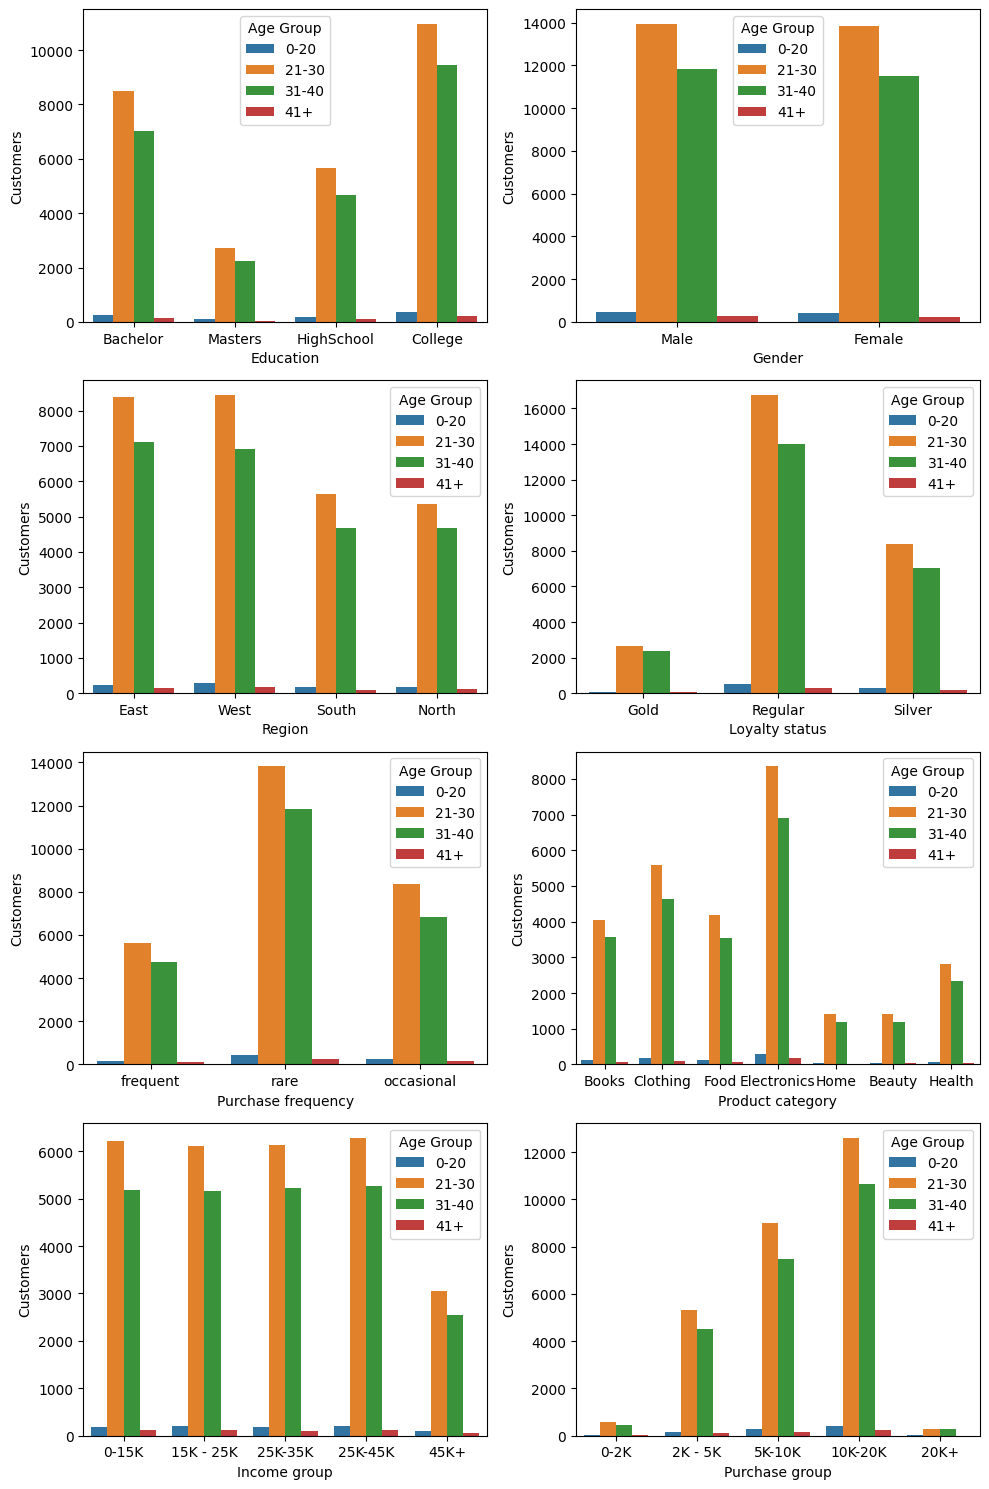

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of x-axis variables
x_vars = ['education', 'gender', 'region', 'Loyalty Status', 'Purchase Frequency', 'Product Category', 'Income Group', 'Purchase Group']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

# Loop through each x-axis variable and corresponding subplot axes
for i, x_var in enumerate(x_vars[:8]):  # Plot the first 8 variables in a 4x2 grid
    row = i // 2  # Determine the row index for the subplot
    col = i % 2   # Determine the column index for the subplot

    # Create countplot
    ax = sns.countplot(
        x=x_var,
        hue='age_group',
        data=df2,
        saturation=0.75,
        ax=axes[row, col]  # Assign subplot axes
    )

    # Set labels for the axes
    ax.set_xlabel(x_var.capitalize())  # Set label for the x-axis
    ax.set_ylabel('Customers')          # Set label for the y-axis
    ax.legend(title='Age Group')        # Set legend title based on x-axis variable

# Remove any unused subplots
for i in range(len(x_vars[:8]), 8):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()